In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**The Data**

In [2]:
df = pd.read_csv('/content/Financial Dataset - 1.csv')
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [3]:
Variable_def = pd.read_csv('/content/VariableDefinitions.csv')
Variable_def

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


**Exploratory Data Analysis**

In [4]:
# Checking for number of rows and columns
df.shape

(23524, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [6]:
# Checking for missing values
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [7]:
# Creating a new dataframe and dropping all the rows with missing values
# since our dataset is quite big with more than 23,000 rows and each is
# having few missing values droping the NaN values wont affect our dataset
df2 = df.dropna()

In [8]:
df2.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [9]:
# Checking for duplicates
df2.duplicated().any()

False

In [ ]:
# Consistency
# Renaming column names to attain consistency
df2.rename(columns={'country':'Country', 'year':'Year',	'uniqueid':'Unique_Id',	'Has a Bank account':'Has a Bank Account', 'household_size':'Household Size',	'gender_of_respondent':'Gender of Respondent', 'The relathip with head':'The Relationship with Head',	'marital_status':'Marital Status'}, inplace=True)

In [11]:
# Checking if the change is implimented
df2.head()

,Country,Year,Unique_Id,Has a Bank Account,Type of Location,Cell Phone Access,Household Size,Respondent Age,Gender of Respondent,The Relationship with Head,Marital Status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Replacing 'Has a Bank Account', 'Cell Phone Access' columns with integers before performing visualization

df2['Has a Bank Account'] = df2['Has a Bank Account'].apply(lambda x:1 if x == 'Yes' else 0)
df2['Cell Phone Access'] = df2['Cell Phone Access'].apply(lambda x:1 if x == 'Yes' else 0)

In [13]:
# seeing if the change was implimented
df2.head()

,Country,Year,Unique_Id,Has a Bank Account,Type of Location,Cell Phone Access,Household Size,Respondent Age,Gender of Respondent,The Relationship with Head,Marital Status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1,Rural,1,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,0,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,1,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,1,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,0,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Dropping irrelevant column
df2.drop(['Unique_Id'], axis = 'columns', inplace = True)

In [ ]:
df2.rename(columns={'Has a Bank Account':'Has_a_Bank_Account', 'Type of Location':'Type_of_Location',	'Cell Phone Access':'Cell_Phone_Access', 'Household Size':'Household_Size', 'Respondent Age':'Respondent_Age', 'Gender of Respondent':'Gender_of_Respondent', 'The Relationship with Head':'The_Relationship_with_Head', 'Marital Status':'Marital_Status', 'Level of Educuation':'Level_of_Education', 'Type of Job':'Type_of_Job'}, inplace=True)

In [19]:
# Viewing our clean dataset
df2.head()

,Country,Year,Has_a_Bank_Account,Type_of_Location,Cell_Phone_Access,Household_Size,Respondent_Age,Gender_of_Respondent,The_Relationship_with_Head,Marital_Status,Level_of_Education,Type_of_Job
0,Kenya,2018,1,Rural,1,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0,Rural,0,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,1,Urban,1,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,0,Rural,1,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,0,Urban,0,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


**Univariate Analysis**

In [20]:
# Checking for nunique values
print(f'Country: {df2.Country.nunique()}')
print(f'Year: {df2.Year.nunique()}')
print(f'Has_a_Bank_Account: {df2.Has_a_Bank_Account.nunique()}')
print(f'Type_of_Location: {df2.Type_of_Location.nunique()}')
print(f'Cell_Phone_Access: {df2.Cell_Phone_Access.nunique()}')
print(f'Household_Size: {df2.Household_Size.nunique()}')
print(f'Respondent_Age: {df2.Respondent_Age.nunique()}')
print(f'Gender_of_Respondent: {df2.Gender_of_Respondent.nunique()}')
print(f'The_Relationship_with_Head: {df2.The_Relationship_with_Head.nunique()}')
print(f'Marital_Status: {df2.Marital_Status.nunique()}')
print(f'Level_of_Education: {df2.Level_of_Education.nunique()}')
print(f'Type_of_Job: {df2.Type_of_Job.nunique()}')

Country: 4
Year: 6
Has_a_Bank_Account: 2
Type_of_Location: 2
Cell_Phone_Access: 2
Household_Size: 21
Respondent_Age: 85
Gender_of_Respondent: 2
The_Relationship_with_Head: 6
Marital_Status: 5
Level_of_Education: 7
Type_of_Job: 10


In [21]:
# descriptive Statistics for numerical columns
df2.describe()

,Year,Has_a_Bank_Account,Cell_Phone_Access,Household_Size,Respondent_Age
count,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000
mean,2016.980594,0.141241,0.742578,3.688643,38.805509
std,0.901740,0.348278,0.437223,2.281184,16.519803
min,2016.000000,0.000000,0.000000,0.000000,16.000000
25%,2016.000000,0.000000,0.000000,2.000000,26.000000
50%,2017.000000,0.000000,1.000000,3.000000,35.000000
75%,2018.000000,0.000000,1.000000,5.000000,49.000000
max,2056.000000,1.000000,1.000000,21.000000,100.000000


*The overall mean of the respondent age is 38 while the minimum age being 16 and maximum 100


*The overall mean of a household size is 3 while the minimum household size is zero(0) and maximum is 21

**Analysing the Target Variable**

In [22]:
# Calculating the percentage of people who have
# bank account and those who don't
Access = df2[df2['Has_a_Bank_Account'] == 1]
No_access = df2[df2['Has_a_Bank_Account'] == 0]

In [23]:
print('Total =', len(df2))
print('Number of people who have bank accounts =', len(Access))
print('% of people who have bank accounts =', 1*len(Access)/len(df2) * 100, '%')


print('Number of people who dont have bank accounts =', len(No_access))
print('% of people who dont have bank accounts =', 1*len(No_access)/len(df2) * 100, '%')

Total = 23343
Number of people who have bank accounts = 3297
% of people who have bank accounts = 14.124148567022235 %
Number of people who dont have bank accounts = 20046
% of people who dont have bank accounts = 85.87585143297777 %


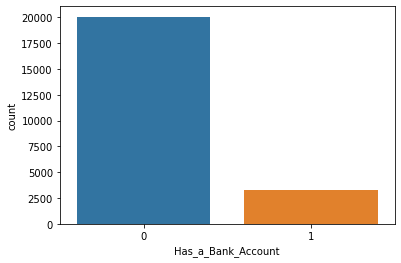

In [24]:
# Plot graph of those who own bank accounts and those who dont
sns.countplot(data=df2,x='Has_a_Bank_Account')

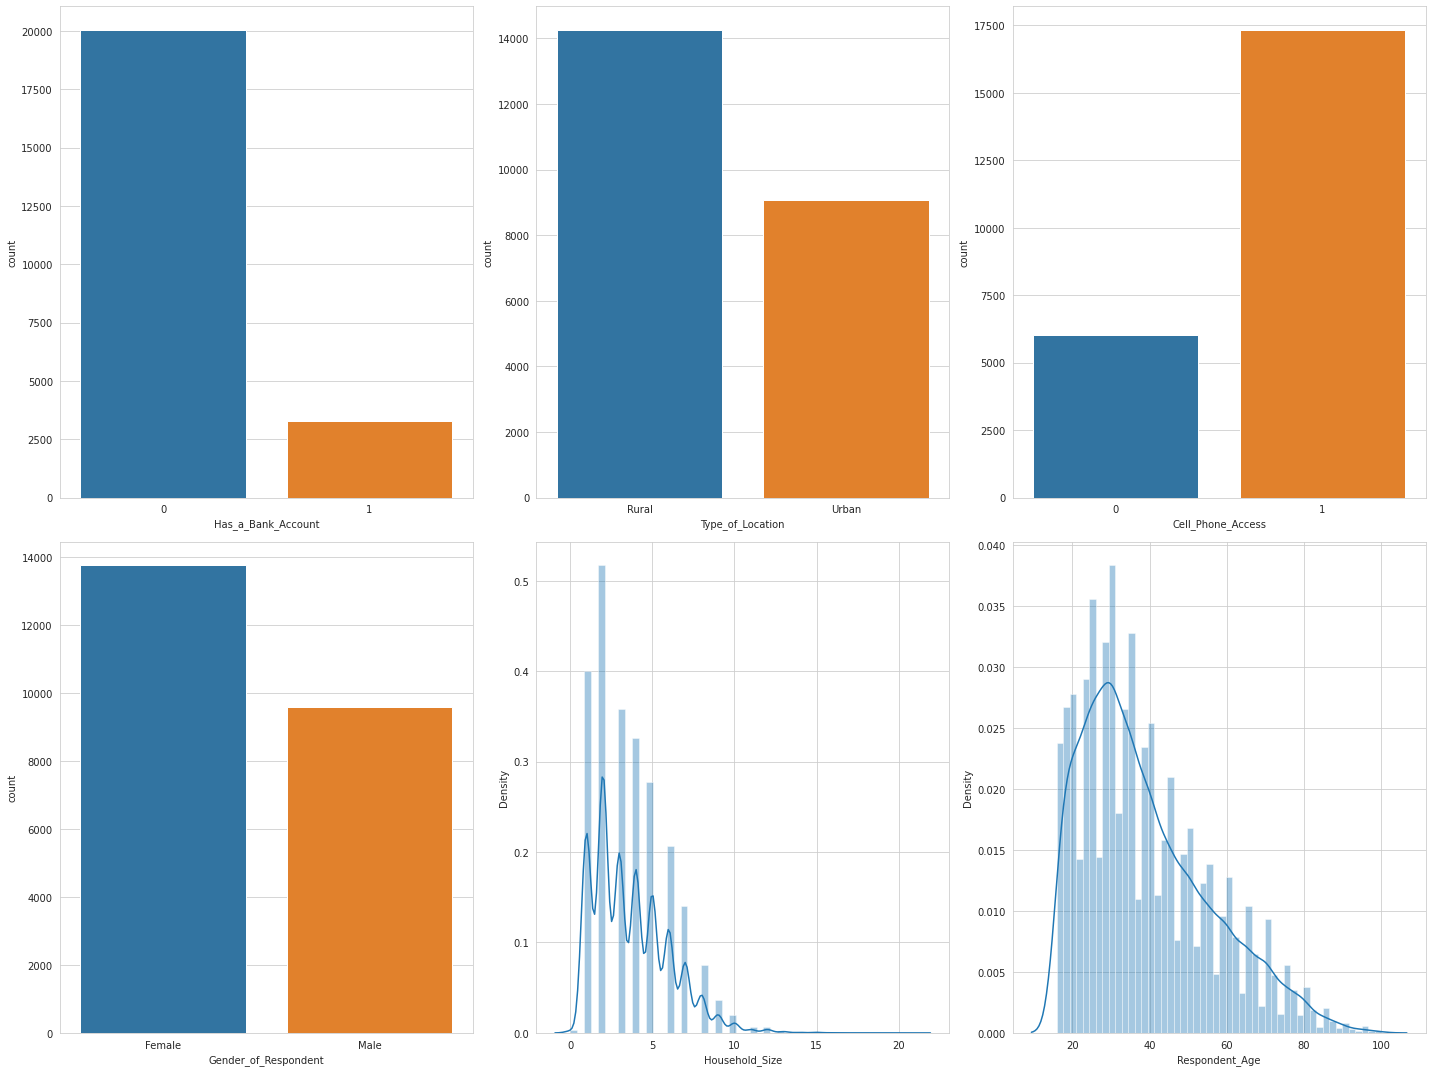

In [25]:
# Combined Univariate Analysis for Each Variable
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_style('whitegrid')
fig, axes = plt.subplots(2,3, figsize=(20,15))
sns.countplot('Has_a_Bank_Account', data=df2, ax=axes[0,0])
sns.countplot('Type_of_Location', data=df2, ax=axes[0,1])
sns.countplot('Cell_Phone_Access', data=df2, ax=axes[0,2])
sns.countplot('Gender_of_Respondent', data=df2, ax=axes[1,0])
sns.distplot(df2['Household_Size'], kde=True, ax=axes[1,1])
sns.distplot(df2['Respondent_Age'], kde=True, ax=axes[1,2])
plt.tight_layout()


*Most people don't have bank accounts

*Most people have access to cell phones

*Most of the respondents' age lie between 20-40

*Average household size lie between 0-3

*We have more females than males 

*Rural population is higher than urban population

**Bivariate Analysis**

Numerical and Numerical Plots

-0.0230498473397427

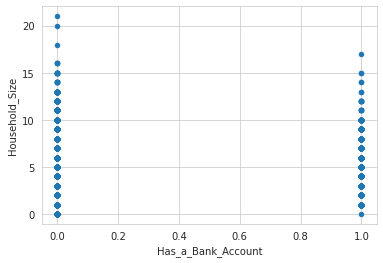

In [26]:
df2.plot(x = 'Has_a_Bank_Account', y = 'Household_Size', kind='scatter')
df2["Household_Size"].corr(df2["Has_a_Bank_Account"])

There is no relationship between household size and a person having a bank account because the correlation coefficient is -0.02 and that is considered a weak correlation

0.01964467227121254

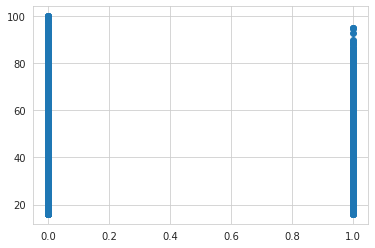

In [27]:
plt.scatter(df2["Has_a_Bank_Account"] , df2["Respondent_Age"])
df2["Respondent_Age"].corr(df2["Has_a_Bank_Account"])

There is also a weak correlation between the Respondents' age and he/she having a bank account

0.20952020174331387

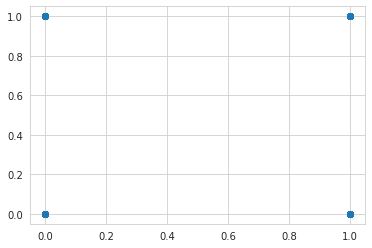

In [28]:
plt.scatter(df2["Has_a_Bank_Account"] , df2["Cell_Phone_Access"])
df2["Cell_Phone_Access"].corr(df2["Has_a_Bank_Account"])

There is a moderate correlation between accessing a cellphone and having a bank account

**Categorical and Numerical plots**

In [29]:
df2.head()

,Country,Year,Has_a_Bank_Account,Type_of_Location,Cell_Phone_Access,Household_Size,Respondent_Age,Gender_of_Respondent,The_Relationship_with_Head,Marital_Status,Level_of_Education,Type_of_Job
0,Kenya,2018,1,Rural,1,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0,Rural,0,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,1,Urban,1,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,0,Rural,1,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,0,Urban,0,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


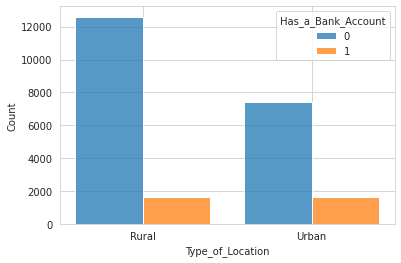

In [33]:
sns.histplot(data=df2, x='Type_of_Location', hue="Has_a_Bank_Account", multiple='dodge', shrink=.8)

Most People in rural areas dont have a bank account compared to urban areas

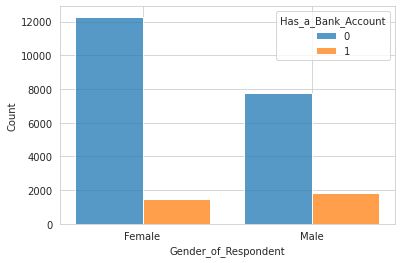

In [35]:
sns.histplot(data=df2, x='Gender_of_Respondent', hue="Has_a_Bank_Account", multiple='dodge', shrink=.8)

More males have a bank account compared to females

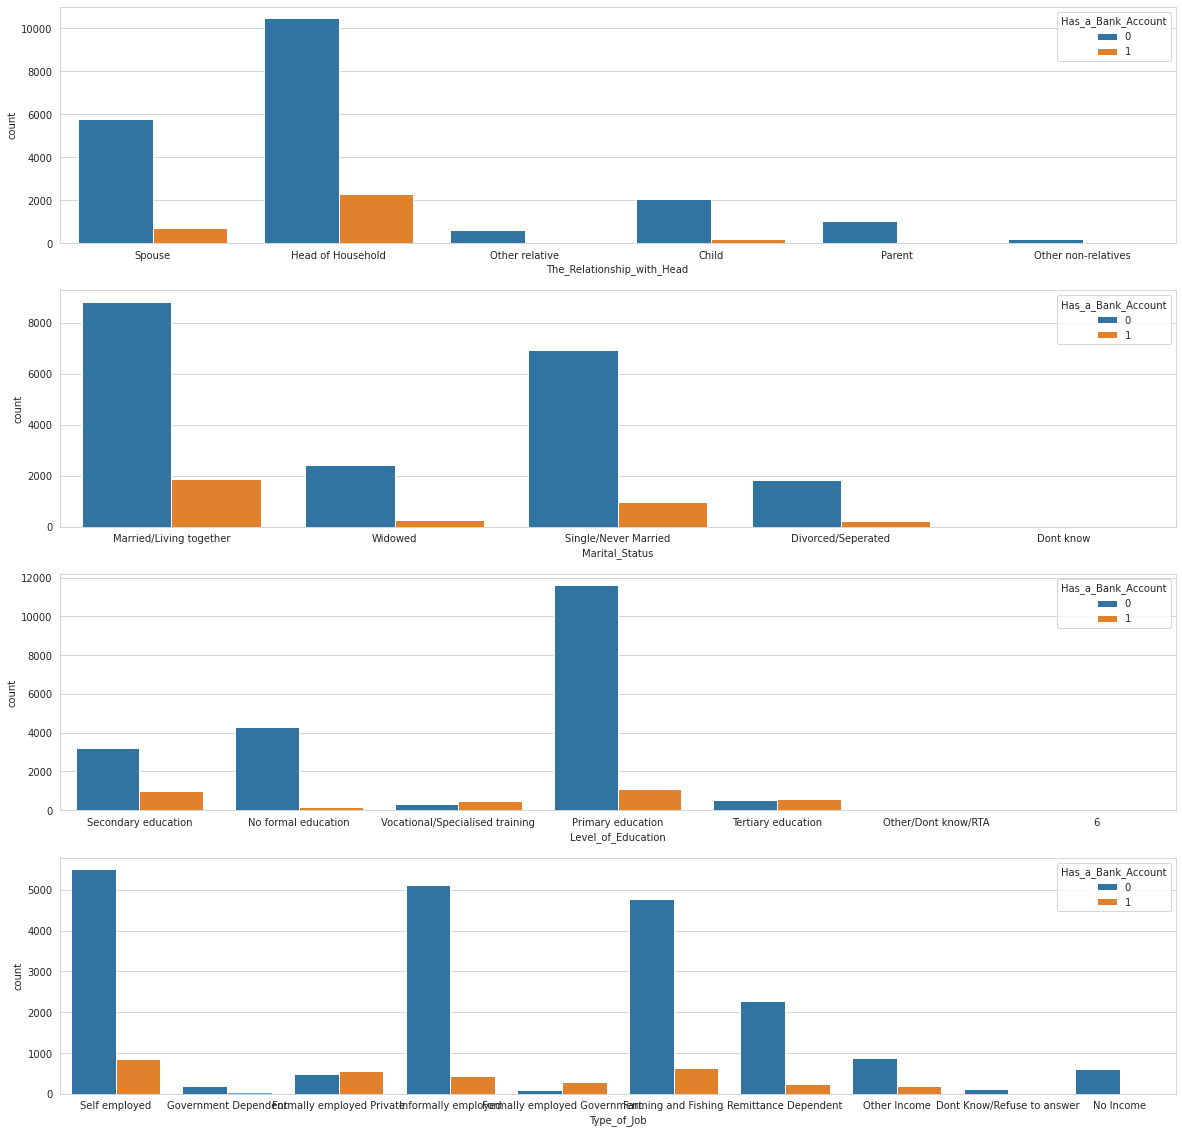

In [39]:
plt.figure(figsize = [20, 20])

plt.subplot(411)
sns.countplot(x = 'The_Relationship_with_Head', hue = 'Has_a_Bank_Account', data = df2)

plt.subplot(412)
sns.countplot(x = 'Marital_Status', hue = 'Has_a_Bank_Account', data = df2)

plt.subplot(413)
sns.countplot(x = 'Level_of_Education', hue = 'Has_a_Bank_Account', data = df2)

plt.subplot(414)
sns.countplot(x = 'Type_of_Job', hue = 'Has_a_Bank_Account', data = df2)

*Most Head of the household own a bank account compared to the  rest

*Most people living together/married own a bank account compared to the devorced/separated

*Few people in Secondary and Primary education level tend to own a bank account compared to the rest

*Most Self employed individuals own a bank account compared to Government dependent individuals

**Multivariate Analysis**

In [ ]:
# Replacing 'Type of location', 'Gender of respondent' columns with integers before performing visualization

df2['Type_of_Location'] = df2['Type_of_Location'].apply(lambda x:1 if x == 'Rural' else 0)
df2['Gender_of_Respondent'] = df2['Gender_of_Respondent'].apply(lambda x:1 if x == 'Female' else 0)

In [42]:
df2.head()

,Country,Year,Has_a_Bank_Account,Type_of_Location,Cell_Phone_Access,Household_Size,Respondent_Age,Gender_of_Respondent,The_Relationship_with_Head,Marital_Status,Level_of_Education,Type_of_Job
0,Kenya,2018,1,1,1,3.0,24.0,1,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0,1,0,5.0,70.0,1,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,1,0,1,5.0,26.0,0,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,0,1,1,5.0,34.0,1,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,0,0,0,8.0,26.0,0,Child,Single/Never Married,Primary education,Informally employed


In [47]:
# Data PreProcessing
x = df2.iloc[:,3:-4].values
y = df2.iloc[:,2:-9].values

In [48]:
print(x)

[[ 1.  1.  3. 24.  1.]
 [ 1.  0.  5. 70.  1.]
 [ 0.  1.  5. 26.  0.]
 ...
 [ 1.  1.  5. 27.  1.]
 [ 0.  1.  7. 30.  1.]
 [ 1.  1. 10. 20.  0.]]


In [49]:
print(y)

[[1]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


Splitting the dataset into training set and test set

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Normalization

In [52]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Applying PCA

In [53]:
from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

Explained Variance ratio

In [54]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.2699684 , 0.21867549, 0.20565232, 0.17017232, 0.13553147])

In [55]:
# Using one principal component
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [56]:
# Training and making predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [57]:
#Performance Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[4008    0]
 [ 661    0]]
Accuracy 0.8584279288926965


After our examination we have achieved an accuracy of 85.84%
after remarkably reducing the number of features in the dataset using 1 principal component